In [59]:
# Warning ! You need to install geopandas on anaconda first
import os
import pandas as pd
import numpy as np
import json
import geopandas as gpd
import folium
from folium.plugins import HeatMap

In [60]:
fname = "./BikePaths/reseau_cyclable_2018_c.geojson"

bp = gpd.read_file(fname)

print(type(bp))

bp

<class 'geopandas.geodataframe.GeoDataFrame'>


,ID,ID_TRC_GEO,TYPE_VOIE,TYPE_VOIE2,LONGUEUR,NBR_VOIE,SEPARATEUR,SAISONS4,PROTEGE_4S,Ville_MTL,NOM_ARR_VI,geometry
0,8998.0,1230109.0,4.0,0.0,90.0,2.0,M,OUI,OUI,OUI,Le Plateau-Mont-Royal,(LINESTRING Z (-73.59024203982732 45.532589280...
1,2.0,0.0,5.0,0.0,20.0,2.0,None,NON,NON,OUI,Rivi�re-des-Prairies�Pointe-aux-Trembles,(LINESTRING Z (-73.49679478102101 45.695741649...
2,3.0,1623974.0,1.0,0.0,36.0,2.0,None,NON,NON,OUI,Rivi�re-des-Prairies�Pointe-aux-Trembles,(LINESTRING Z (-73.57344998170396 45.658526272...
3,4.0,1010521.0,3.0,31.0,46.0,1.0,None,NON,NON,OUI,Ahuntsic-Cartierville,(LINESTRING Z (-73.71793473411516 45.535498916...
4,5.0,0.0,5.0,0.0,42.0,2.0,None,NON,NON,OUI,Le Sud-Ouest,(LINESTRING Z (-73.55178529735286 45.490851250...
...,...,...,...,...,...,...,...,...,...,...,...,...
6390,9048.0,0.0,4.0,0.0,37.0,2.0,M,None,None,OUI,Verdun,(LINESTRING Z (-73.58081478479296 45.465652788...
6391,9055.0,4012362.0,4.0,0.0,142.0,2.0,M,NON,NON,OUI,Rivi�re-des-Prairies�Pointe-aux-Trembles,(LINESTRING Z (-73.54196326966586 45.659322867...
6392,9056.0,4012356.0,4.0,0.0,745.0,2.0,M,NON,NON,OUI,Rivi�re-des-Prairies�Pointe-aux-Trembles,(LINESTRING Z (-73.54331042277438 45.658472763...
6393,9057.0,9999.0,1.0,0.0,8.0,2.0,M,NON,NON,OUI,Rivi�re-des-Prairies�Pointe-aux-Trembles,(LINESTRING Z (-73.54022970362077 45.660267491...


In [61]:
print(bp.Ville_MTL.unique())

['OUI' 'NON']


In [77]:
bp = bp[bp['Ville_MTL']=='OUI']

In [78]:
print(bp.Ville_MTL.unique())

['OUI']


In [103]:
bp[0:23]

,ID,ID_TRC_GEO,TYPE_VOIE,TYPE_VOIE2,LONGUEUR,NBR_VOIE,SEPARATEUR,SAISONS4,PROTEGE_4S,Ville_MTL,NOM_ARR_VI,geometry
0,8998.0,1230109.0,4.0,0.0,90.0,2.0,M,OUI,OUI,OUI,Le Plateau-Mont-Royal,(LINESTRING Z (-73.59024203982732 45.532589280...
1,2.0,0.0,5.0,0.0,20.0,2.0,None,NON,NON,OUI,Rivi�re-des-Prairies�Pointe-aux-Trembles,(LINESTRING Z (-73.49679478102101 45.695741649...
2,3.0,1623974.0,1.0,0.0,36.0,2.0,None,NON,NON,OUI,Rivi�re-des-Prairies�Pointe-aux-Trembles,(LINESTRING Z (-73.57344998170396 45.658526272...
3,4.0,1010521.0,3.0,31.0,46.0,1.0,None,NON,NON,OUI,Ahuntsic-Cartierville,(LINESTRING Z (-73.71793473411516 45.535498916...
4,5.0,0.0,5.0,0.0,42.0,2.0,None,NON,NON,OUI,Le Sud-Ouest,(LINESTRING Z (-73.55178529735286 45.490851250...
5,8166.0,0.0,5.0,0.0,98.0,2.0,None,OUI,NON,OUI,Ville-Marie,(LINESTRING Z (-73.54921347660739 45.490059037...
6,7.0,0.0,5.0,0.0,47.0,2.0,M,OUI,NON,OUI,Le Sud-Ouest,(LINESTRING Z (-73.57405690259547 45.477981666...
8,9.0,0.0,5.0,0.0,75.0,2.0,None,OUI,NON,OUI,Lachine,(LINESTRING Z (-73.64986256925802 45.447438189...
9,10.0,0.0,5.0,0.0,227.0,2.0,None,NON,NON,OUI,Rivi�re-des-Prairies�Pointe-aux-Trembles,(LINESTRING Z (-73.50016489149503 45.656432919...
10,11.0,0.0,5.0,0.0,67.0,2.0,None,NON,NON,OUI,Ville-Marie,(LINESTRING Z (-73.55357381759519 45.525215899...


In [79]:
bp.reset_index

<bound method DataFrame.reset_index of           ID  ID_TRC_GEO  TYPE_VOIE  TYPE_VOIE2  LONGUEUR  NBR_VOIE  \
0     8998.0   1230109.0        4.0         0.0      90.0       2.0   
1        2.0         0.0        5.0         0.0      20.0       2.0   
2        3.0   1623974.0        1.0         0.0      36.0       2.0   
3        4.0   1010521.0        3.0        31.0      46.0       1.0   
4        5.0         0.0        5.0         0.0      42.0       2.0   
...      ...         ...        ...         ...       ...       ...   
6390  9048.0         0.0        4.0         0.0      37.0       2.0   
6391  9055.0   4012362.0        4.0         0.0     142.0       2.0   
6392  9056.0   4012356.0        4.0         0.0     745.0       2.0   
6393  9057.0      9999.0        1.0         0.0       8.0       2.0   
6394  9058.0   4012364.0        1.0         0.0      10.0       2.0   

     SEPARATEUR SAISONS4 PROTEGE_4S Ville_MTL  \
0             M      OUI        OUI       OUI   
1         

In [80]:
len(bp)

5639

In [81]:
bikelane0 = bp['geometry'][21]

KeyError: 21

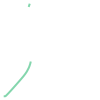

In [82]:
bikelane0

In [83]:
len(bikelane0) # bikelane0 is a MultiLineString, a list of lines

2

In [84]:
bikelane0[1].xy

(array('d', [-73.95142409560741, -73.95135487165166, -73.95132384724207, -73.95129361220681, -73.95115178365133, -73.95099057833492, -73.95068194745552, -73.95039538719399, -73.95021219624351, -73.95013251877415, -73.95009821390079, -73.95002609044235, -73.94997438209447, -73.94989822986055, -73.94985704367303, -73.94981141796688, -73.94978124312384, -73.94977840199897]),
 array('d', [45.4116215499253, 45.411619029651746, 45.41162618581792, 45.41164426466218, 45.411788298372194, 45.41196135141324, 45.41230802838937, 45.41263498857471, 45.41285208832847, 45.41295593700181, 45.41300401947887, 45.41310913052494, 45.413202499541676, 45.413351553365544, 45.41345225252327, 45.41359248144896, 45.41371926389975, 45.41373543131926]))

In [85]:
bikelane0[1].xy[0]

array('d', [-73.95142409560741, -73.95135487165166, -73.95132384724207, -73.95129361220681, -73.95115178365133, -73.95099057833492, -73.95068194745552, -73.95039538719399, -73.95021219624351, -73.95013251877415, -73.95009821390079, -73.95002609044235, -73.94997438209447, -73.94989822986055, -73.94985704367303, -73.94981141796688, -73.94978124312384, -73.94977840199897])

In [86]:
mean_length = bp.LONGUEUR.mean()
print(mean_length)

133.49512324880297


In [87]:
sum_length = bp.LONGUEUR.max()
print(sum_length)

2446.0


In [88]:
len(bp['geometry'])

5639

In [89]:
count = 0
print("These are multilines roads")
for k in range(len(bp['geometry'])):
    if (len(bp['geometry'][k])>1):
        print(k)
    count+=len(bp['geometry'][k])
print("Overal number of different lines :", count)

These are multilines roads


KeyError: 7

In [90]:
count = 0
for k in range(len(bp['geometry'])):
    count+=len(bp['geometry'][k][0].xy[0])
print("Overal number of points :", count)

KeyError: 7

In [91]:
data_pointsx = np.array([])
data_pointsy = np.array([])
for k in range(len(bp['geometry'])):
    data_pointsx = np.append(data_pointsx, bp['geometry'][k][0].xy[1])
    data_pointsy = np.append(data_pointsy, bp['geometry'][k][0].xy[0])
data_points = np.vstack((data_pointsx, data_pointsy)).T # np.array([data_pointsx.tolist(), data_pointsy.tolist()]).T

KeyError: 7

In [92]:
data_points[0]

array([ 45.53258928, -73.59024204])

In [93]:
geo_json_data = json.load(open("./BikePaths/reseau_cyclable_2018_c.geojson"))

In [97]:
m_bike = folium.Map([45.53,-73.666], tiles='cartodbpositron', zoom_start=11)
HeatMap(data_points).add_to(m_bike)
m_bike

In [35]:
geo_json_data['features'].head()

AttributeError: 'list' object has no attribute 'head'

In [51]:
print(geo_json_data['features'][0]['properties']['LONGUEUR'])

for k in reversed(range(len(geo_json_data['features']))):
    if geo_json_data['features'][k]['properties']['LONGUEUR'] <= mean_length:
        geo_json_data['features'].remove(geo_json_data['features'][k])


90.0


In [52]:
#geo_json_data['features'] = geo_json_data['features']#[0:5]

In [53]:
folium.GeoJson(geo_json_data).add_to(m_bike)
m_bike